In [1]:
"""
Heat Risk France - Data Exploration Notebook
Cell 1: Setup and Imports
"""

# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set up plotting style
plt.style.use('default')
%matplotlib inline

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Import our config
import sys
sys.path.append('..')
from config import LCZ_DIR, POPULATION_DIR, LCZ_HEAT_MAPPING, LCZ_DESCRIPTIONS

print("✅ All libraries imported successfully!")
print(f"📁 LCZ data directory: {LCZ_DIR}")
print(f"📁 Population data directory: {POPULATION_DIR}")

✅ All libraries imported successfully!
📁 LCZ data directory: /Users/antoineverhulst/Documents/Project/claude/heat_risk_france/data/raw/lcz
📁 Population data directory: /Users/antoineverhulst/Documents/Project/claude/heat_risk_france/data/raw/population


In [2]:
"""
Cell 2: Load and Inspect Paris LCZ Data
"""

# Find the Paris shapefile
paris_dir = LCZ_DIR / "Paris"
print(f"Looking for data in: {paris_dir}")
print(f"Directory exists: {paris_dir.exists()}\n")

# List all files in the Paris directory
if paris_dir.exists():
    print("Files in Paris directory:")
    for file in sorted(paris_dir.iterdir()):
        print(f"  - {file.name}")
    print()
    
    # Find the .shp file
    shapefiles = list(paris_dir.glob("*.shp"))
    
    if shapefiles:
        shapefile_path = shapefiles[0]
        print(f"✅ Found shapefile: {shapefile_path.name}\n")
        
        # Load the shapefile
        print("Loading Paris LCZ data...")
        paris_lcz = gpd.read_file(shapefile_path)
        
        print(f"✅ Loaded successfully!")
        print(f"   - Number of zones: {len(paris_lcz)}")
        print(f"   - Coordinate system: {paris_lcz.crs}")
        print(f"   - Total area covered: {paris_lcz.geometry.area.sum() / 1_000_000:.2f} km²")
    else:
        print("❌ No .shp file found!")
else:
    print("❌ Paris directory not found!")
    print("Please check that you extracted the Paris LCZ data to:")
    print(f"   {paris_dir}")

Looking for data in: /Users/antoineverhulst/Documents/Project/claude/heat_risk_france/data/raw/lcz/Paris
Directory exists: True

Files in Paris directory:
  - DL&DC_LCZ_SPOT_2022.pdf
  - LCZ_SPOT_2022_Paris.dbf
  - LCZ_SPOT_2022_Paris.prj
  - LCZ_SPOT_2022_Paris.qml
  - LCZ_SPOT_2022_Paris.shp
  - LCZ_SPOT_2022_Paris.shx
  - LCZ_SPOT_2022_Paris_carte.pdf
  - LCZ_SPOT_2022_Paris_metadata.xml
  - LCZ_SPOT_2022_Paris_raster_1m5.qml
  - LCZ_SPOT_2022_Paris_raster_1m5.tif

✅ Found shapefile: LCZ_SPOT_2022_Paris.shp

Loading Paris LCZ data...
✅ Loaded successfully!
   - Number of zones: 156314
   - Coordinate system: EPSG:2154
   - Total area covered: 12095.28 km²


In [3]:
"""
Cell 3: Explore the structure of Paris LCZ data
"""

print("=" * 60)
print("DATA STRUCTURE OVERVIEW")
print("=" * 60)

# Show column names
print("\n📋 Column names:")
print(paris_lcz.columns.tolist())

# Show data types
print("\n📊 Data types:")
print(paris_lcz.dtypes)

# Show first few rows
print("\n👀 First 5 rows:")
print(paris_lcz.head())

# Show basic statistics
print("\n📈 Basic info:")
print(paris_lcz.info())

DATA STRUCTURE OVERVIEW

📋 Column names:
['identifier', 'hre', 'are', 'bur', 'ror', 'bsr', 'war', 'ver', 'vhr', 'lcz', 'lcz_int', 'geometry']

📊 Data types:
identifier      object
hre            float64
are            float64
bur            float64
ror            float64
bsr            float64
war            float64
ver            float64
vhr            float64
lcz             object
lcz_int          int64
geometry      geometry
dtype: object

👀 First 5 rows:
       identifier    hre      are    bur    ror  bsr  war    ver     vhr lcz  \
0  100027-FR001L1  10.90  6534.40  85.62  12.89  0.0  0.0   1.49  100.00   8   
1   10023-FR001L1  18.14   281.09  74.20  25.80  0.0  0.0   0.00    0.00   2   
2  100262-FR001L1  15.48  1035.14  30.31  40.48  0.0  0.0  29.21   97.23   8   
3  100261-FR001L1  10.10  3141.48  10.05  12.95  0.0  0.0  77.00   77.94   5   
4  100263-FR001L1  38.74   778.58  44.49  53.20  0.0  0.0   2.31   33.33   1   

   lcz_int                                           ge

In [4]:
"""
Cell 4: Analyze LCZ Types Distribution in Paris
"""

print("=" * 60)
print("LCZ CLASSIFICATION ANALYSIS")
print("=" * 60)

# Count each LCZ type
print("\n📊 Distribution of LCZ types:")
lcz_counts = paris_lcz['lcz'].value_counts().sort_index()
print(lcz_counts)

# Show as percentages
print("\n📈 Percentage distribution:")
lcz_pct = (paris_lcz['lcz'].value_counts(normalize=True) * 100).sort_index()
for lcz_type, pct in lcz_pct.items():
    description = LCZ_DESCRIPTIONS.get(str(lcz_type), "Unknown")
    print(f"  LCZ {lcz_type}: {pct:5.2f}% - {description}")

# Calculate heat scores
print("\n🌡️ Adding heat scores to data...")
paris_lcz['heat_score'] = paris_lcz['lcz'].astype(str).map(LCZ_HEAT_MAPPING)

# Check for any unmapped values
unmapped = paris_lcz[paris_lcz['heat_score'].isna()]
if len(unmapped) > 0:
    print(f"⚠️  Warning: {len(unmapped)} zones have unmapped LCZ values:")
    print(unmapped['lcz'].value_counts())
else:
    print("✅ All LCZ values successfully mapped to heat scores!")

# Show heat score distribution
print("\n🔥 Heat Score Statistics:")
print(paris_lcz['heat_score'].describe())

print(f"\nAverage heat score for Paris: {paris_lcz['heat_score'].mean():.2f} / 10")

LCZ CLASSIFICATION ANALYSIS

📊 Distribution of LCZ types:
lcz
1      110
2     6740
3     2065
4      281
5     9202
6    26105
8     7488
9    32752
A    36667
B    13641
C     6578
D     3997
E     5241
F     4008
G     1439
Name: count, dtype: int64

📈 Percentage distribution:
  LCZ 1:  0.07% - Compact high-rise: Dense tall buildings
  LCZ 2:  4.31% - Compact mid-rise: Dense medium buildings
  LCZ 3:  1.32% - Compact low-rise: Dense low buildings
  LCZ 4:  0.18% - Open high-rise: Tall buildings with open space
  LCZ 5:  5.89% - Open mid-rise: Medium buildings with open space
  LCZ 6: 16.70% - Open low-rise: Low buildings with open space
  LCZ 8:  4.79% - Large low-rise: Large footprint buildings
  LCZ 9: 20.95% - Sparsely built: Scattered structures
  LCZ A: 23.46% - Dense trees: Forest/heavily vegetated
  LCZ B:  8.73% - Scattered trees: Parks with trees
  LCZ C:  4.21% - Bush/scrub: Low vegetation
  LCZ D:  2.56% - Low plants: Grassland/agriculture
  LCZ E:  3.35% - Bare rock/pave

Creating heat map visualization...


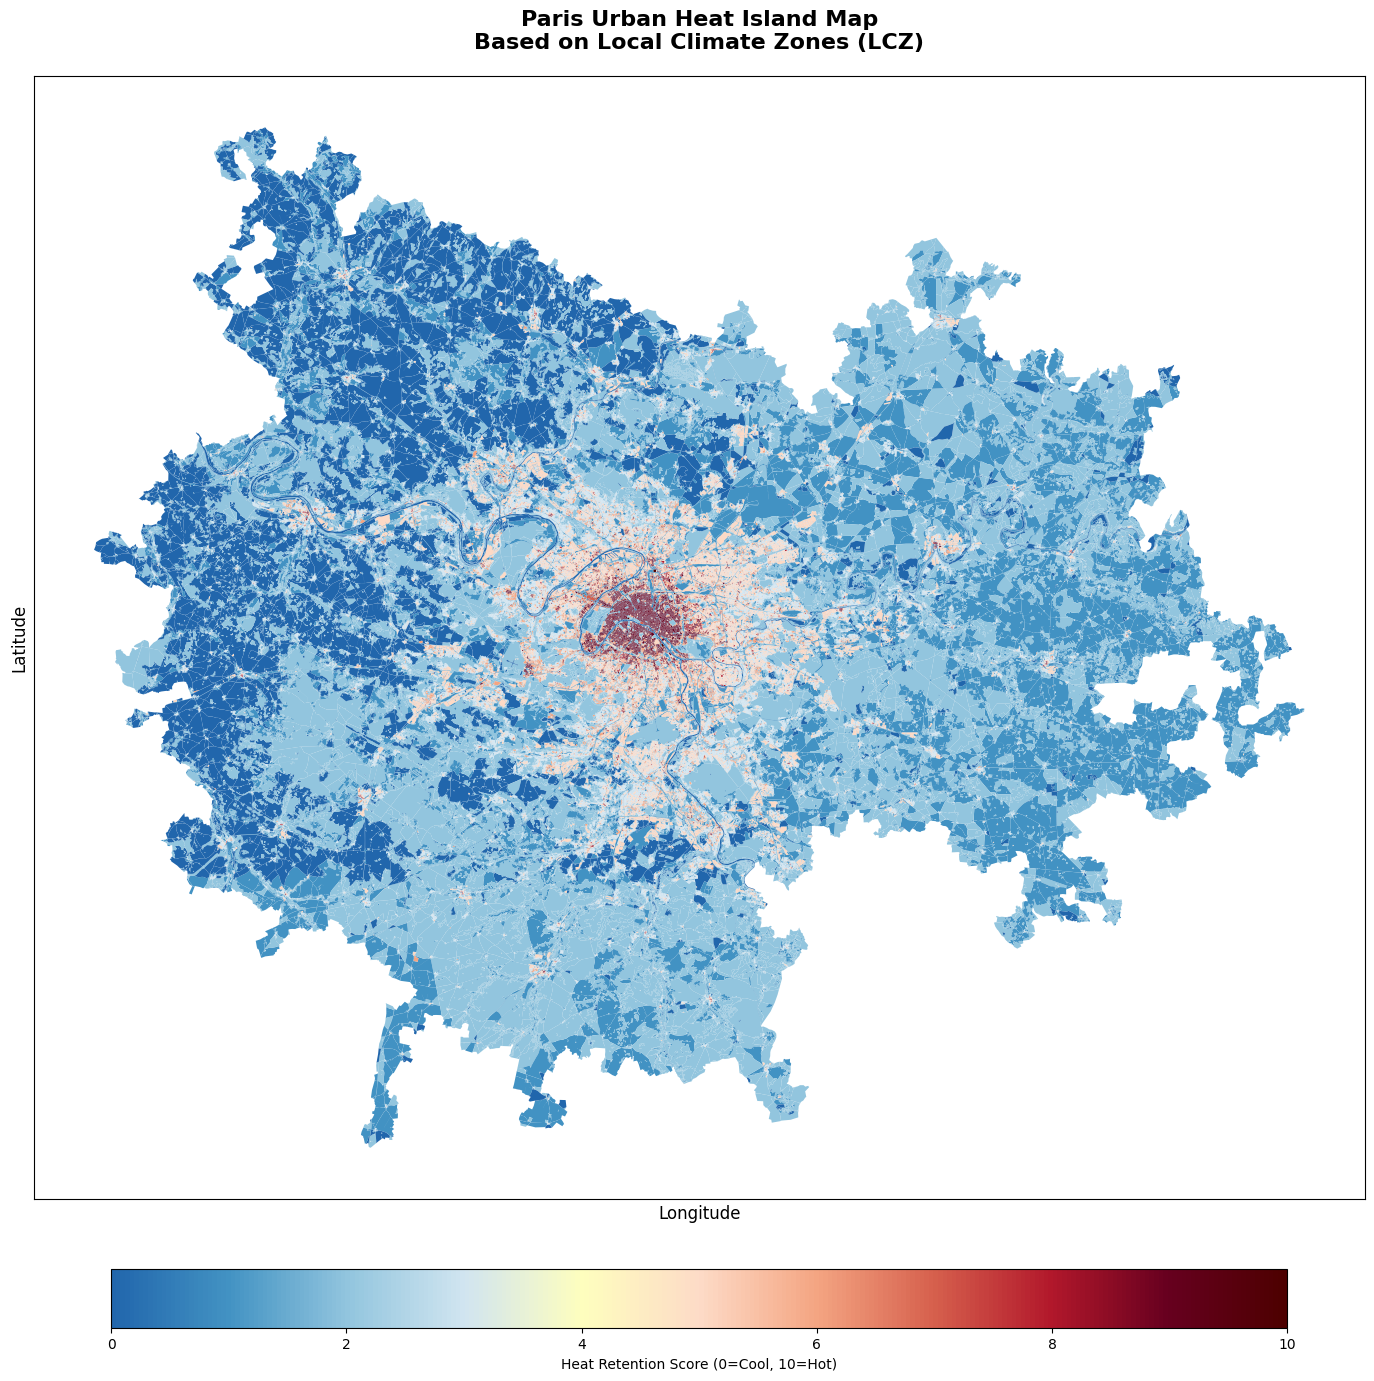

✅ Map created!

🔥 Hot spots (heat score >= 8): 8915 zones
🌡️  Moderate (heat score 5-7): 43076 zones
❄️  Cool areas (heat score < 5): 104323 zones


In [9]:
"""
Cell 5: Visualize Paris Heat Island Map
"""

import matplotlib.colors as mcolors

print("Creating heat map visualization...")

# Create figure with larger size
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Define color map for heat scores (0=cool blue to 10=hot red)
colors = ['#2166ac', '#4393c3', '#92c5de', '#d1e5f0', 
          '#fefebe', '#fddbc7', '#f4a582', '#d6604d', 
          '#b2182b', '#67001f', '#4d0000']
cmap = mcolors.LinearSegmentedColormap.from_list('heat', colors)

# Plot the heat scores
paris_lcz.plot(
    column='heat_score',
    cmap=cmap,
    linewidth=0,
    ax=ax,
    legend=True,
    vmin=0,
    vmax=10,
    legend_kwds={
        'label': "Heat Retention Score (0=Cool, 10=Hot)",
        'orientation': "horizontal",
        'shrink': 0.8,
        'pad': 0.05
    }
)

ax.set_title('Paris Urban Heat Island Map\nBased on Local Climate Zones (LCZ)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_aspect('equal')

# Remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

print(f"✅ Map created!")
print(f"\n🔥 Hot spots (heat score >= 8): {len(paris_lcz[paris_lcz['heat_score'] >= 8])} zones")
print(f"🌡️  Moderate (heat score 5-7): {len(paris_lcz[(paris_lcz['heat_score'] >= 5) & (paris_lcz['heat_score'] < 8)])} zones")
print(f"❄️  Cool areas (heat score < 5): {len(paris_lcz[paris_lcz['heat_score'] < 5])} zones")

In [10]:
# Check the geometry column
print("Type of data:", type(paris_lcz))
print("\nGeometry column:")
print(paris_lcz['geometry'].head())

# Each row has a POLYGON with coordinates!
print("\nFirst zone's geometry:")
print(paris_lcz.iloc[0]['geometry'])

Type of data: <class 'geopandas.geodataframe.GeoDataFrame'>

Geometry column:
0    POLYGON ((648247.909 6860284.771, 648180.197 6...
1    POLYGON ((650986.669 6862970.945, 650943.977 6...
2    POLYGON ((653252.891 6858631.520, 653255.996 6...
3    POLYGON ((623180.096 6855585.849, 623179.662 6...
4    POLYGON ((653404.901 6858462.097, 653344.644 6...
Name: geometry, dtype: geometry

First zone's geometry:
POLYGON ((648247.9093904245 6860284.771164367, 648180.1965662191 6860254.844948651, 648121.9523733282 6860318.341222581, 648063.708902537 6860379.191022746, 648060.8894290746 6860383.677802328, 648138.1441286487 6860440.120376648, 648240.2354496168 6860295.632082404, 648247.9093904245 6860284.771164367))


In [13]:
"""
Cell 6: Analyze High-Risk Urban Heat Zones
"""

print("=" * 60)
print("HIGH-RISK URBAN HEAT ZONE ANALYSIS")
print("=" * 60)

# Filter for high heat zones (compact urban areas)
high_heat = paris_lcz[paris_lcz['heat_score'] >= 8].copy()

print(f"\n🔥 High Heat Zones (score >= 8):")
print(f"   - Number of zones: {len(high_heat)}")
print(f"   - Percentage of total: {len(high_heat)/len(paris_lcz)*100:.2f}%")
print(f"   - Total area: {high_heat.geometry.area.sum() / 1_000_000:.2f} km²")

# What LCZ types are these?
print(f"\n📊 LCZ types in high heat zones:")
for lcz_type, count in high_heat['lcz'].value_counts().items():
    description = LCZ_DESCRIPTIONS.get(str(lcz_type), "Unknown")
    pct = count / len(high_heat) * 100
    print(f"   LCZ {lcz_type}: {count:5d} zones ({pct:5.1f}%) - {description}")

# Analyze urban characteristics of high heat zones
print(f"\n🏢 Urban Characteristics of High Heat Zones:")
print(f"   Average building height: {high_heat['hre'].mean():.1f} m")
print(f"   Average built surface ratio: {high_heat['bur'].mean():.1f}%")
print(f"   Average impervious surface: {high_heat['ror'].mean():.1f}%")
print(f"   Average vegetation: {high_heat['ver'].mean():.1f}%")

# Compare with overall Paris
print(f"\n📈 Comparison with Paris overall:")
print(f"   Building height - High heat: {high_heat['hre'].mean():.1f}m vs All Paris: {paris_lcz['hre'].mean():.1f}m")
print(f"   Vegetation - High heat: {high_heat['ver'].mean():.1f}% vs All Paris: {paris_lcz['ver'].mean():.1f}%")
print(f"   Impervious surface - High heat: {high_heat['ror'].mean():.1f}% vs All Paris: {paris_lcz['ror'].mean():.1f}%")

HIGH-RISK URBAN HEAT ZONE ANALYSIS

🔥 High Heat Zones (score >= 8):
   - Number of zones: 8915
   - Percentage of total: 5.70%
   - Total area: 75.96 km²

📊 LCZ types in high heat zones:
   LCZ 2:  6740 zones ( 75.6%) - Compact mid-rise: Dense medium buildings
   LCZ 3:  2065 zones ( 23.2%) - Compact low-rise: Dense low buildings
   LCZ 1:   110 zones (  1.2%) - Compact high-rise: Dense tall buildings

🏢 Urban Characteristics of High Heat Zones:
   Average building height: 14.5 m
   Average built surface ratio: 55.3%
   Average impervious surface: 35.3%
   Average vegetation: 9.4%

📈 Comparison with Paris overall:
   Building height - High heat: 14.5m vs All Paris: 5.8m
   Vegetation - High heat: 9.4% vs All Paris: 60.2%
   Impervious surface - High heat: 35.3% vs All Paris: 20.4%


Hot zones (score >= 7): 9196 zones
Cool zones (score <= 3): 104323 zones


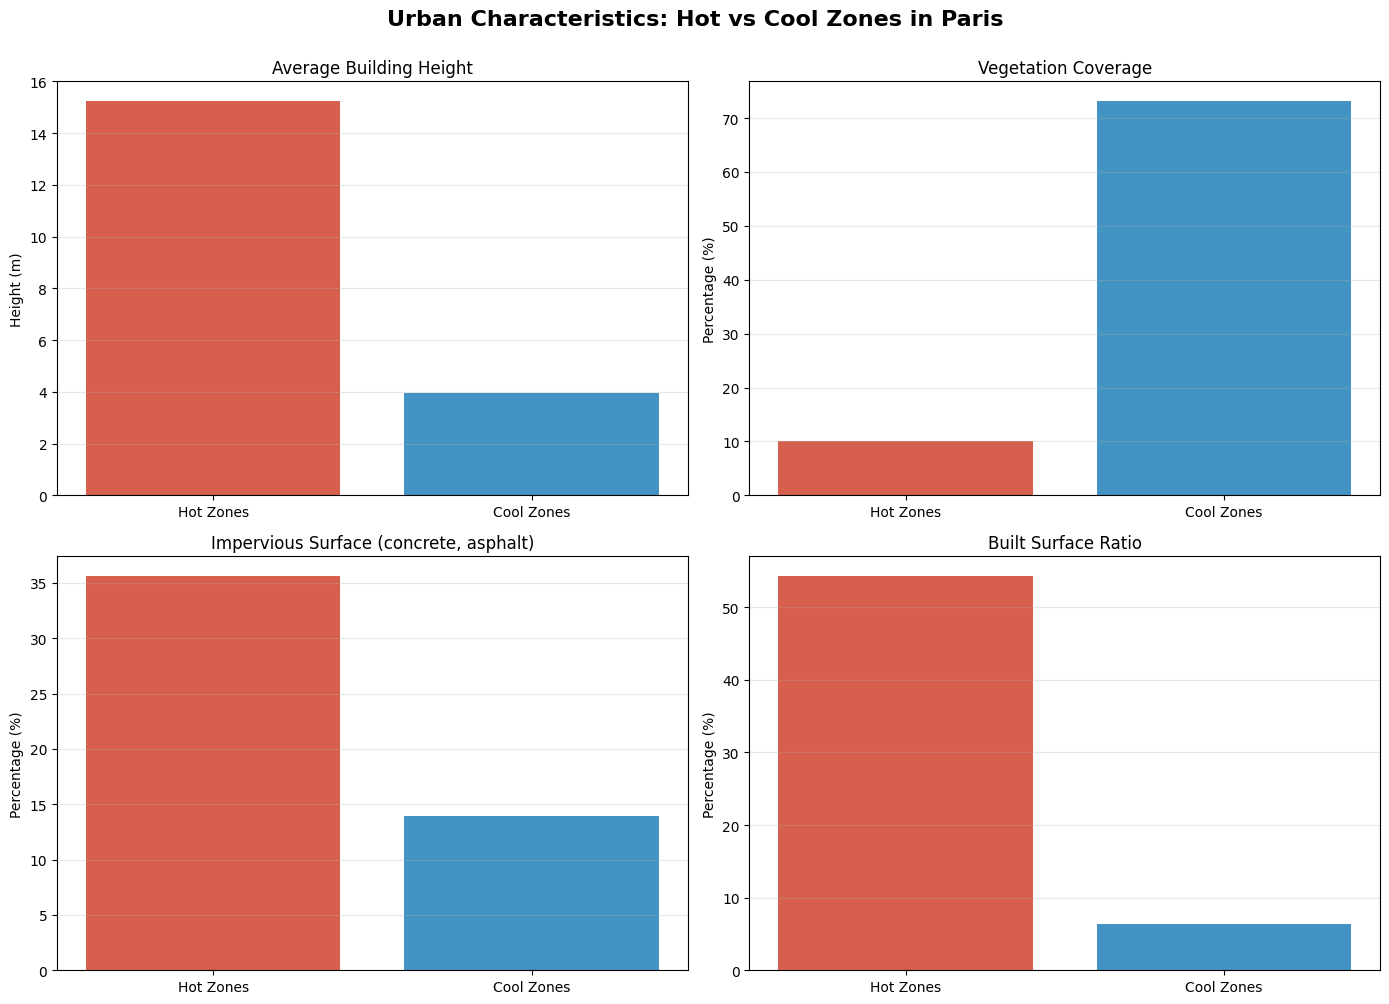


💡 Key Insights:
   - Hot zones have 3.9x taller buildings
   - Cool zones have 7.3x more vegetation
   - Hot zones have 2.5x more impervious surface


In [15]:
"""
Cell 7: Compare characteristics of Hot vs Cool zones
"""

# Define categories
hot_zones = paris_lcz[paris_lcz['heat_score'] >= 7].copy()
cool_zones = paris_lcz[paris_lcz['heat_score'] <= 3].copy()

print(f"Hot zones (score >= 7): {len(hot_zones)} zones")
print(f"Cool zones (score <= 3): {len(cool_zones)} zones")

# Create comparison chart
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Building Height
axes[0, 0].bar(['Hot Zones', 'Cool Zones'], 
               [hot_zones['hre'].mean(), cool_zones['hre'].mean()],
               color=['#d6604d', '#4393c3'])
axes[0, 0].set_ylabel('Height (m)')
axes[0, 0].set_title('Average Building Height')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Vegetation
axes[0, 1].bar(['Hot Zones', 'Cool Zones'], 
               [hot_zones['ver'].mean(), cool_zones['ver'].mean()],
               color=['#d6604d', '#4393c3'])
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_title('Vegetation Coverage')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Impervious Surface
axes[1, 0].bar(['Hot Zones', 'Cool Zones'], 
               [hot_zones['ror'].mean(), cool_zones['ror'].mean()],
               color=['#d6604d', '#4393c3'])
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_title('Impervious Surface (concrete, asphalt)')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Built Surface
axes[1, 1].bar(['Hot Zones', 'Cool Zones'], 
               [hot_zones['bur'].mean(), cool_zones['bur'].mean()],
               color=['#d6604d', '#4393c3'])
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Built Surface Ratio')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Urban Characteristics: Hot vs Cool Zones in Paris', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print(f"   - Hot zones have {hot_zones['hre'].mean() / cool_zones['hre'].mean():.1f}x taller buildings")
print(f"   - Cool zones have {cool_zones['ver'].mean() / hot_zones['ver'].mean():.1f}x more vegetation")
print(f"   - Hot zones have {hot_zones['ror'].mean() / cool_zones['ror'].mean():.1f}x more impervious surface")

In [18]:
"""
Cell 8: Save processed data for use in Streamlit app
"""

from config import PROCESSED_DATA_DIR, CRS_WEB

print("=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

# Ensure processed directory exists
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)

# Reproject to Web Mercator (standard for web maps)
print("\n🌍 Reprojecting to Web Mercator (EPSG:4326)...")
paris_lcz_web = paris_lcz.to_crs(CRS_WEB)

# Simplify geometries for faster loading in web app (optional but recommended)
print("📐 Simplifying geometries for web display...")
paris_lcz_web['geometry'] = paris_lcz_web['geometry'].simplify(tolerance=0.0001)

# Select only columns we need for the app
columns_to_keep = [
    'identifier', 'lcz', 'heat_score', 
    'hre', 'bur', 'ror', 'ver', 'vhr',
    'geometry'
]
paris_lcz_final = paris_lcz_web[columns_to_keep].copy()

# Save as GeoPackage (efficient format)
output_file = PROCESSED_DATA_DIR / "paris_heat_zones.gpkg"
print(f"\n💾 Saving to: {output_file}")
paris_lcz_final.to_file(output_file, driver='GPKG')

# Also save summary statistics as CSV
summary_stats = pd.DataFrame({
    'city': ['Paris'],
    'total_zones': [len(paris_lcz_final)],
    'avg_heat_score': [paris_lcz_final['heat_score'].mean()],
    'high_risk_zones': [len(paris_lcz_final[paris_lcz_final['heat_score'] >= 8])],
    'high_risk_percentage': [len(paris_lcz_final[paris_lcz_final['heat_score'] >= 8]) / len(paris_lcz_final) * 100],
    'avg_vegetation': [paris_lcz_final['ver'].mean()],
    'avg_building_height': [paris_lcz_final['hre'].mean()]
})

summary_file = PROCESSED_DATA_DIR / "city_summary.csv"
summary_stats.to_csv(summary_file, index=False)

print(f"✅ Saved GeoPackage: {output_file.name}")
print(f"✅ Saved summary stats: {summary_file.name}")
print(f"\n📊 File sizes:")
print(f"   - GeoPackage: {output_file.stat().st_size / 1_000_000:.2f} MB")
print(f"   - Summary CSV: {summary_file.stat().st_size / 1_000:.2f} KB")

print("\n🎉 Data processing complete!")
print("   You can now use this data in your Streamlit app.")

SAVING PROCESSED DATA

🌍 Reprojecting to Web Mercator (EPSG:4326)...
📐 Simplifying geometries for web display...

💾 Saving to: /Users/antoineverhulst/Documents/Project/claude/heat_risk_france/data/processed/paris_heat_zones.gpkg
✅ Saved GeoPackage: paris_heat_zones.gpkg
✅ Saved summary stats: city_summary.csv

📊 File sizes:
   - GeoPackage: 72.66 MB
   - Summary CSV: 0.19 KB

🎉 Data processing complete!
   You can now use this data in your Streamlit app.


In [16]:
"""
Cell 9: Summary and Next Steps
"""

print("=" * 60)
print("📋 DATA EXPLORATION SUMMARY - PARIS")
print("=" * 60)

print("\n✅ What we learned:")
print(f"   1. Paris has {len(paris_lcz):,} climate zones mapped")
print(f"   2. Average heat score: {paris_lcz['heat_score'].mean():.2f}/10 (moderate)")
print(f"   3. Most common zone type: Dense trees (23.5% - cooling effect!)")
print(f"   4. High-risk zones: {len(paris_lcz[paris_lcz['heat_score'] >= 8])} zones ({len(paris_lcz[paris_lcz['heat_score'] >= 8])/len(paris_lcz)*100:.1f}%)")

print("\n🔬 Key findings:")
print("   - Hot zones have taller buildings and less vegetation")
print("   - Cool zones are heavily vegetated with less concrete")
print("   - Clear correlation between urban density and heat retention")

print("\n📁 Data saved:")
print("   ✓ paris_heat_zones.gpkg - Ready for Streamlit app")
print("   ✓ city_summary.csv - City-level statistics")

print("\n🚀 Next Steps:")
print("   1. ✅ Phase 1 Complete - Data exploration done!")
print("   2. 🔄 Phase 2 - Add population vulnerability data")
print("   3. 🎨 Phase 3 - Build Streamlit app")
print("   4. 📊 Phase 4 - Create risk assessment combining heat + vulnerability")

print("\n💡 To start Phase 2:")
print("   - Download population data with age breakdowns")
print("   - Join population data to geographic zones")
print("   - Calculate vulnerability scores (% elderly population)")

print("\n" + "=" * 60)
print("Great work! 🎉 Save this notebook and commit to Git!")
print("=" * 60)

📋 DATA EXPLORATION SUMMARY - PARIS

✅ What we learned:
   1. Paris has 156,314 climate zones mapped
   2. Average heat score: 3.25/10 (moderate)
   3. Most common zone type: Dense trees (23.5% - cooling effect!)
   4. High-risk zones: 8915 zones (5.7%)

🔬 Key findings:
   - Hot zones have taller buildings and less vegetation
   - Cool zones are heavily vegetated with less concrete
   - Clear correlation between urban density and heat retention

📁 Data saved:
   ✓ paris_heat_zones.gpkg - Ready for Streamlit app
   ✓ city_summary.csv - City-level statistics

🚀 Next Steps:
   1. ✅ Phase 1 Complete - Data exploration done!
   2. 🔄 Phase 2 - Add population vulnerability data
   3. 🎨 Phase 3 - Build Streamlit app
   4. 📊 Phase 4 - Create risk assessment combining heat + vulnerability

💡 To start Phase 2:
   - Download population data with age breakdowns
   - Join population data to geographic zones
   - Calculate vulnerability scores (% elderly population)

Great work! 🎉 Save this notebook a